<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.456827,37.375238,55.116591,36.697540,-0.191523,228.454674,228.634849,-0.180175
1,0.0,1.0,32.672697,41.622505,30.537069,37.004322,-0.124079,151.712513,151.784010,-0.071497
2,0.0,2.0,39.545619,76.871323,67.902871,82.894187,-0.020327,277.193672,277.195066,-0.001394
3,0.0,3.0,40.617635,46.098096,74.348146,99.285100,-0.178255,270.170722,270.342050,-0.171328
4,0.0,4.0,58.052254,66.595322,27.472550,85.019528,-0.009285,247.130370,247.108074,0.022295
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.197194,53.437377,55.727677,56.873800,-0.039544,245.196504,245.220405,-0.023900
29996,999.0,26.0,73.003168,63.620023,99.263270,25.229358,-0.075033,271.040786,271.097451,-0.056665
29997,999.0,27.0,87.057542,69.589202,73.883576,72.385276,0.016334,312.931930,312.921298,0.010631
29998,999.0,28.0,81.448397,50.095047,73.584268,45.599554,-0.232992,260.494275,260.713834,-0.219559


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.456827,37.375238,55.116591,36.697540,-0.191523,228.454674,228.634849,-0.180175
1,0.0,1.0,32.672697,41.622505,30.537069,37.004322,-0.124079,151.712513,151.784010,-0.071497
2,0.0,2.0,39.545619,76.871323,67.902871,82.894187,-0.020327,277.193672,277.195066,-0.001394
3,0.0,3.0,40.617635,46.098096,74.348146,99.285100,-0.178255,270.170722,270.342050,-0.171328
4,0.0,4.0,58.052254,66.595322,27.472550,85.019528,-0.009285,247.130370,247.108074,0.022295
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.197194,53.437377,55.727677,56.873800,-0.039544,245.196504,245.220405,-0.023900
29996,999.0,26.0,73.003168,63.620023,99.263270,25.229358,-0.075033,271.040786,271.097451,-0.056665
29997,999.0,27.0,87.057542,69.589202,73.883576,72.385276,0.016334,312.931930,312.921298,0.010631
29998,999.0,28.0,81.448397,50.095047,73.584268,45.599554,-0.232992,260.494275,260.713834,-0.219559


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.456827,37.375238,55.116591,36.697540,-0.191523,228.454674,228.634849,-0.180175
1,0.0,1.0,32.672697,41.622505,30.537069,37.004322,-0.124079,151.712513,151.784010,-0.071497
2,0.0,2.0,39.545619,76.871323,67.902871,82.894187,-0.020327,277.193672,277.195066,-0.001394
3,0.0,3.0,40.617635,46.098096,74.348146,99.285100,-0.178255,270.170722,270.342050,-0.171328
4,0.0,4.0,58.052254,66.595322,27.472550,85.019528,-0.009285,247.130370,247.108074,0.022295
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.197194,53.437377,55.727677,56.873800,-0.039544,245.196504,245.220405,-0.023900
29996,999.0,26.0,73.003168,63.620023,99.263270,25.229358,-0.075033,271.040786,271.097451,-0.056665
29997,999.0,27.0,87.057542,69.589202,73.883576,72.385276,0.016334,312.931930,312.921298,0.010631
29998,999.0,28.0,81.448397,50.095047,73.584268,45.599554,-0.232992,260.494275,260.713834,-0.219559


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    89.456827  37.375238  55.116591  36.697540 -0.191523  228.454674   
      1.0    32.672697  41.622505  30.537069  37.004322 -0.124079  151.712513   
      2.0    39.545619  76.871323  67.902871  82.894187 -0.020327  277.193672   
      3.0    40.617635  46.098096  74.348146  99.285100 -0.178255  270.170722   
      4.0    58.052254  66.595322  27.472550  85.019528 -0.009285  247.130370   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.197194  53.437377  55.727677  56.873800 -0.039544  245.196504   
      26.0   73.003168  63.620023  99.263270  25.229358 -0.075033  271.040786   
      27.0   87.057542  69.589202  73.883576  72.385276  0.016334  312.931930   
      28.0   81.448397  50.095047  73.584268  45.599554 -0.232992  260.494275   
      29.0   35.777749  83.479438  32.373640  78.964490  0.011491  240.606808   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    228.634849 -0.180175  
      1.0    151.784010 -0.071497  
      2.0    277.195066 -0.001394  
      3.0    270.342050 -0.171328  
      4.0    247.108074  0.022295  
...                 ...       ...  
999.0 25.0   245.220405 -0.023900  
      26.0   271.097451 -0.056665  
      27.0   312.921298  0.010631  
      28.0   260.713834 -0.219559  
      29.0   240.577593  0.029216  

[30000 rows x 8 columns]

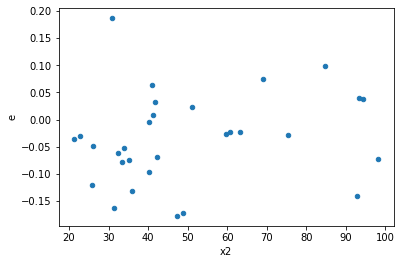

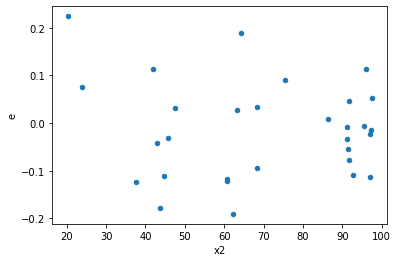

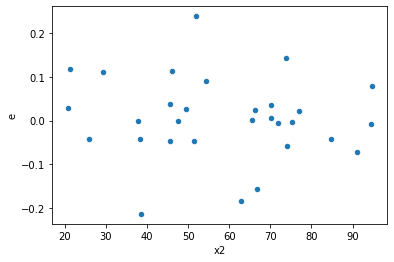

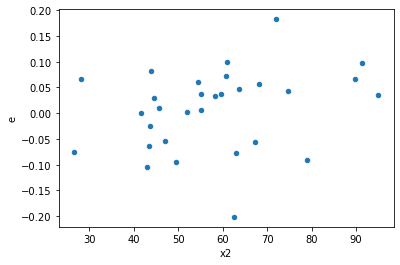

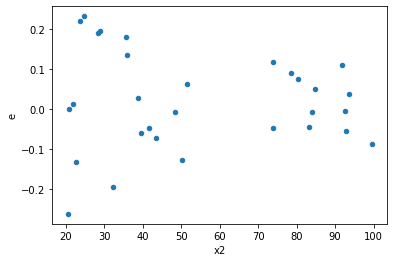

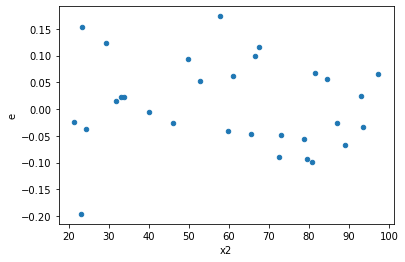

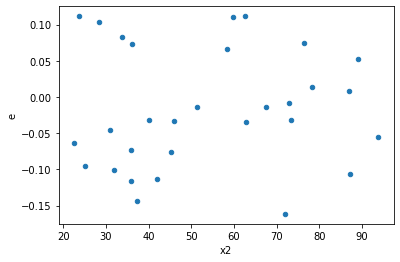

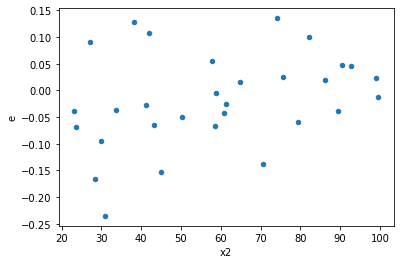

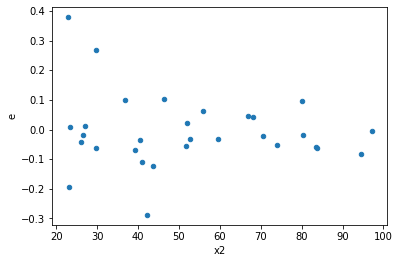

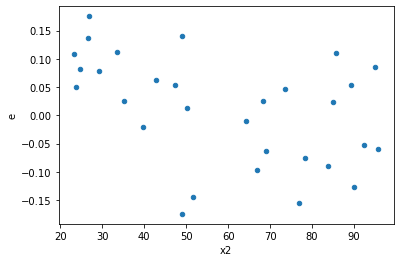

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,8.0,8.0,0.04415853743624058,0.06725182347788901,0.005519817179530073,0.008406477934736126,1.5229631093419307,0.5655568105668589,0.7172215947165705,0.28277840528342946,Reject005=1 : Homoscedasticity
16.0,8.0,8.0,0.011316059598999641,0.05216630819749026,0.0014145074498749552,0.006520788524686283,4.609935794444017,0.04470206381387576,0.9776489680930621,0.02235103190693788,Reject005=0 : Heteroscedasticity
19.0,8.0,8.0,0.05168610066201741,0.05953247798951182,0.0064607625827521765,0.0074415597486889775,1.1518082661875184,0.846439531200045,0.5767802343999775,0.4232197656000225,Reject005=1 : Homoscedasticity
25.0,8.0,8.0,0.0663600123271936,0.09714849515839286,0.0082950015408992,0.012143561894799107,1.463961379021361,0.6023926111462332,0.6988036944268834,0.3011963055731166,Reject005=1 : Homoscedasticity
34.0,8.0,8.0,0.019520849305935926,0.048179111627597665,0.0024401061632419907,0.006022388953449708,2.4680848088380714,0.22285671319943123,0.8885716434002844,0.11142835659971562,Reject005=1 : Homoscedasticity
45.0,8.0,8.0,0.05966622563195753,0.07608055469088339,0.007458278203994691,0.009510069336360423,1.2751025204807702,0.7393239418872635,0.6303380290563683,0.36966197094363173,Reject005=1 : Homoscedasticity
56.0,8.0,8.0,0.022444083101699822,0.027697590157590154,0.0028055103877124778,0.0034621987696987692,1.2340709144626385,0.7733078805060691,0.6133460597469654,0.38665394025303457,Reject005=1 : Homoscedasticity
70.0,8.0,8.0,0.03177804463502606,0.04787413598073723,0.003972255579378257,0.005984266997592154,1.5065161035103436,0.5755642160150443,0.7122178919924779,0.28778210800752213,Reject005=1 : Homoscedasticity
74.0,8.0,8.0,0.024650074757535237,0.06092431659863455,0.0030812593446919046,0.007615539574829319,2.471567214213446,0.2221575554939752,0.8889212222530124,0.1110787777469876,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.11267323405301224,0.02461100295291328,0.01408415425662653,0.00307637536911416,0.21842812234655407,0.04560150860323639,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,0.04415853743624058,0.06725182347788901,0.005519817179530073,0.008406477934736126,1.5229631093419307,0.5655568105668589,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,0.156434127741616,0.005780661749107207,0.019554265967702,0.0007225827186384009,0.036952689496598794,0.0001035166242706873,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,0.10945458390561315,0.09166993245497437,0.013681822988201644,0.011458741556871797,0.8375156999731034,0.8080733577400785,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,0.13522260540676548,0.05347711328429289,0.016902825675845685,0.006684639160536611,0.3954746554647978,0.21107473152384343,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,0.05704183642599816,0.0371085549990626,0.00713022955324977,0.004638569374882825,0.6505497951000312,0.5570752589237316,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.07392959073186947,0.015524751772650206,0.009241198841483684,0.0019405939715812757,0.20999374700931242,0.04068817360917634,Reject005=0 : Heteroscedasticity
7.0,8.0,8.0,0.08085447682938873,0.026095670466292326,0.010106809603673592,0.0032619588082865407,0.32274861565621005,0.13030137621406976,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,0.06859310361838486,0.030327460486244632,0.008574137952298107,0.003790932560780579,0.442135708787436,0.26946505903194334,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      847
Reject005=0 : Heteroscedasticity    153
Name: Result_test, dtype: int64